In [4]:
import ROOT
%jsroot on
ROOT.PyConfig.DisableRootLogon = True
ROOT.PyConfig.IgnoreCommandLineOptions = False
import numpy as np
 
from __future__ import print_function
from ROOT import TCanvas, TGraph
from ROOT import gROOT
from math import sin
from array import array
from ROOT import TFile
import ROOT as r
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

%matplotlib inline

In [ ]:
root_file_path ="/home/jacob/data/typ2_ptsrc_pf100_pa110_seed45.root" 
df = r.RDataFrame('tree',root_file_path)
d1 = df.Display(["time","rotationangle",'phi'])
d1.Print()

import pandas as pd
#column1 = ["time","rotationangle",'rotatedphi']
column2 = ['primary_polx','primary_poly']
column3 = ['theta']
column4= ['phi','rotatedphi']
pddf = pd.DataFrame(df.AsNumpy(columns=column4))
pddf
#pddf.to_csv('/home/jacob/notebooks/PSFLoactions.csv',sep=',',header=True,mode='w',index=False)

In [ ]:
plt.hist(pddf['phi'],bins=50)
plt.xlabel('phi')
plt.ylabel('frequency')

In [ ]:
PulseP = np.histogram(pddf['phi'],bins=100)
Counts = PulseP[0]
P = []

CenterofBins = (PulseP[1][:-1] + PulseP[1][1:])/2
    
plt.figure()
plt.errorbar(CenterofBins*180/np.pi,PulseP[0],yerr = np.sqrt(PulseP[0]),fmt='o',markersize=2)
plt.xlabel('Phi')
plt.ylabel('COUNTS')
#scatter normal to the PA, +180 to get symmetry
plt.vlines(45+90,PulseP[0].min(),PulseP[0].max(),color='grey',label='scattered phi, PA+90,270')
plt.vlines(45+90+180,PulseP[0].min(),PulseP[0].max(),color='grey')

plt.vlines(45,PulseP[0].min(),PulseP[0].max(),color='green',label='PA')
plt.vlines(45+180,PulseP[0].min(),PulseP[0].max(),color='red',label='PA+180')
plt.legend()

In [2]:
degree_to_rad = np.pi/180
angle_step_degree = 10

angle_step_rad = angle_step_degree * degree_to_rad
angles = np.arange(0,2*np.pi,angle_step_rad)
def find_probabilities(angle_min,angle_max,data_frame):
    counts = len(data_frame.loc[data_frame['phi'].between(angle_min,angle_max)])
    total_counts = len(data_frame)
    probability = counts/total_counts
    prob_error = np.sqrt(((np.sqrt(counts)/counts)**2)+((np.sqrt(total_counts)/total_counts)**2))*(probability*100)
    return probability,prob_error
probabilities = []
probability_error = []
for i in range(len(angles)):
    prob,prob_error = find_probabilities(angles[i],angles[i]+angle_step_rad,pddf)
    probabilities = np.append(probabilities,prob)
    probability_error = np.append(probability_error,prob_error)
print(probabilities*100,probability_error*100)

probs_dataframe = pd.DataFrame()
probs_dataframe['probs'] = probabilities
probs_dataframe['phi'] = angles+(angle_step_rad/2)

plt.errorbar(probs_dataframe['phi'],probs_dataframe['probs']*100,yerr=probability_error*100,fmt='o',markersize=4)
plt.ylabel('Probability [%]')
plt.xlabel('Phi [radians]')

NameError: name 'pddf' is not defined

/tmp/ipykernel_390669/2933731486.py:53: RuntimeWarning: divide by zero encountered in scalar divide
  if detectors['xi']['top_detector']<=((y_-10)/np.tan(i*degree_to_rad))+10<= detectors['xf']['top_detector'] and (0<=i<=180):
/tmp/ipykernel_390669/2933731486.py:60: RuntimeWarning: divide by zero encountered in scalar divide
  if detectors['xi']['bottom_detector']<=((y_-10)/np.tan(i*degree_to_rad))+10<= detectors['xf']['bottom_detector'] and (180 <= i):


,theta,detector
320,320,right_detector


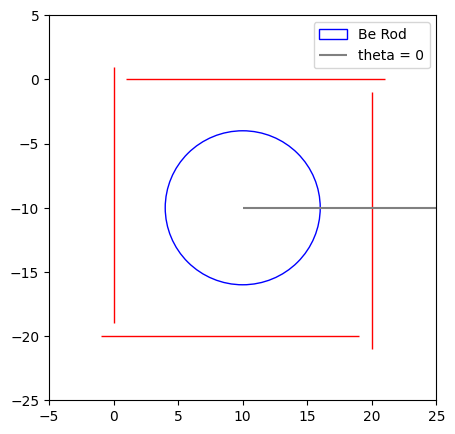

In [5]:
number_of_segments = 2

size_of_detector = 20#in mm
# [xi,yi,xf,yf]

detectors = pd.DataFrame(columns = ['xi','yi','xf','yf'],index=['top_detector','right_detector','bottom_detector','left_detector'])

detectors.loc['top_detector'] = [1,0,size_of_detector+1,0] #top detector

detectors.loc['right_detector'] = [size_of_detector,-1,size_of_detector,-size_of_detector-1] #right detector

detectors.loc['bottom_detector'] = [0-1,-size_of_detector,size_of_detector-1,-size_of_detector] # bottom detector

detectors.loc['left_detector'] = [0,1,0,-size_of_detector+1] #left Detector

detectors
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(5,5))

top_detector = patches.Rectangle((detectors['xi']['top_detector'], detectors['yi']['top_detector']), 
                                 detectors['xf']['top_detector']-detectors['xi']['top_detector'], detectors['yf']['top_detector']-detectors['yi']['top_detector'], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(top_detector)


top_detector = patches.Rectangle((detectors['xi']['right_detector'], detectors['yi']['right_detector']), 
                                 detectors['xf']['right_detector']-detectors['xi']['right_detector'], detectors['yf']['right_detector']-detectors['yi']['right_detector'], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(top_detector)


top_detector = patches.Rectangle((detectors['xi']['bottom_detector'], detectors['yi']['bottom_detector']), 
                                 detectors['xf']['bottom_detector']-detectors['xi']['bottom_detector'], detectors['yf']['bottom_detector']-detectors['yi']['bottom_detector'], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(top_detector)


top_detector = patches.Rectangle((detectors['xi']['left_detector'], detectors['yi']['left_detector']), 
                                 detectors['xf']['left_detector']-detectors['xi']['left_detector'], detectors['yf']['left_detector']-detectors['yi']['left_detector'], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(top_detector)

Be = plt.Circle((10,-10),6,fill = False,color = 'blue',label ='Be Rod')
ax.add_patch(Be)

ax.hlines(-10,10,40,label='theta = 0',color='grey')


x = np.arange(0,20,1)
theta = 45
angles = pd.DataFrame(columns=['theta','detector'])
for i in range(0,360):
    x_= 20
    if detectors['yi']['right_detector']>=((np.tan(i*degree_to_rad)*(x_-10))-10)>= detectors['yf']['right_detector'] and (0<=i<=90) or (270<=i):
        angles.loc[i] = [i,'right_detector']
    y_ = 0
    if detectors['xi']['top_detector']<=((y_-10)/np.tan(i*degree_to_rad))+10<= detectors['xf']['top_detector'] and (0<=i<=180):
        angles.loc[i] = [i,'top_detector']
    
    x_= 0
    if detectors['yi']['left_detector']>=((np.tan(i*degree_to_rad)*(x_-10))-10)>= detectors['yf']['left_detector'] and (90<=i<=270):
        angles.loc[i] = [i,'left_detector']
    y_ = -20
    if detectors['xi']['bottom_detector']<=((y_-10)/np.tan(i*degree_to_rad))+10<= detectors['xf']['bottom_detector'] and (180 <= i):
        angles.loc[i] = [i,'bottom_detector']
    angles.loc[90] = [90,'top_detector']
    angles.loc[270] = [270,'bottom_detector']

display(angles.loc[angles['theta']==320])

ax.set_xlim(-5,25)
ax.set_ylim(-25,5)
theta = 30
#ax.plot(x,(np.tan(theta*degree_to_rad)*(x-10))-10,color = 'orange')
plt.legend()
plt.show()


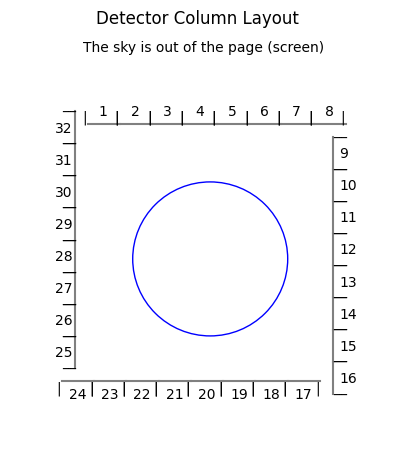

In [85]:
number_of_segments = 8
center_x = 10.5
center_y = 10.5
size_of_detector = 20#in mm

size_of_segment = size_of_detector/number_of_segments
# [xi,yi,xf,yf]

detectors = pd.DataFrame(columns = ['xi','yi','xf','yf','segment','loc'])
segment = 1
while segment <= number_of_segments:
    segs = segment - 1
    
    detectors.loc[segment] = [1+segs*size_of_segment,0,(segs+1)*size_of_segment+1,0, segment,'top'] #top detector
    detectors.loc[segment+number_of_segments] = [size_of_detector,-1-segs*size_of_segment,size_of_detector,-(segs+1)*size_of_segment-1,segment+number_of_segments,'right'] #right detector
    detectors.loc[segment+2*number_of_segments] = [-1+segs*size_of_segment,-size_of_detector,+(segs+1)*size_of_segment-1,-size_of_detector,segment+2*number_of_segments,'bottom']
    detectors.loc[segment+3*number_of_segments] = [0,1-segs*size_of_segment,0,-(segs+1)*size_of_segment+1,segment+3*number_of_segments,'left']
    segment += 1
    


#display(detectors.sort_values('segment'))
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(5,5))

for i in range(len(detectors)):
    i += 1
    x = np.array([detectors['xi'].loc[i],detectors['xf'].loc[i]]).T
    y = np.array([detectors['yi'].loc[i],detectors['yf'].loc[i]]).T
    ax.plot(x,y,ms=8,markevery=[-1],color='grey')
    if detectors['loc'].loc[i] == 'top' or detectors['loc'].loc[i] == 'bottom':
        if detectors['loc'].loc[i] == 'top':
            ax.annotate("|", xy=(x[0]-0.4, y[0]+0.2))
            ax.annotate("|", xy=(x[1]-0.4, y[1]+0.2))
            ax.text((x[0]+x[1])/2-0.4,0.6+(y[0]+y[1])/2,f'{i}')
        if detectors['loc'].loc[i] == 'bottom':
            ax.annotate("|", xy=(x[0]-0.4, y[0]-0.9))
            ax.annotate("|", xy=(x[1]-0.4, y[1]-0.9))
            ax.text((x[0]+x[1])/2-0.7,(y[0]+y[1])/2-1.4,f'{8-(i-17)+16}')
    else:
        if detectors['loc'].loc[i] == 'left': 
            ax.text((x[0]+x[1])/2-1.5,(y[0]+y[1])/2-0.4,f'{8-(i-25)+24}')
            ax.annotate("__", xy=(x[0]-1, y[0]+0.1))
            ax.annotate("__", xy=(x[1]-1, y[1]+0.1))
        if detectors['loc'].loc[i] == 'right': 
            ax.text((x[0]+x[1])/2+.5,(y[0]+y[1])/2-0.4,f'{i}')
            ax.annotate("__", xy=(x[0], y[0]+0.1))
            ax.annotate("__", xy=(x[1], y[1]+0.1))
Be = plt.Circle((center_x,-center_y),6,fill = False,color = 'blue',label ='Be Rod')
ax.add_patch(Be)

#ax.hlines(-10,10,40,label='theta = 0',color='grey')


x = np.arange(0,20,1)
angles = pd.DataFrame(columns=['theta','detector'])
'''
for i in np.arange(0,360,0.1):
    y_= 0
    top = detectors['segment'].loc[(detectors['loc'] == 'top' )&( detectors['xi']<((y_+center_y)/np.tan(i*degree_to_rad))+center_x)&((((y_+center_y)/np.tan(i*degree_to_rad))+center_x) <=detectors['xf'])&((0<=i<=180))]
    if len(top)==1 :
        angles.loc[i] = [i,top.values[0]]
    
    y_ = -20
    bottom = detectors['segment'].loc[(detectors['loc'] == 'bottom' )&( detectors['xi']<((y_+center_y)/np.tan(i*degree_to_rad))+center_x)&((((y_+center_y)/np.tan(i*degree_to_rad))+center_x) <=detectors['xf'])&((180<=i<=360))]
    if len(bottom)==1 :
        
        angles.loc[i] = [i,bottom.values[0]]

    x_ = 0
    left = detectors['segment'].loc[(detectors['loc'] == 'left' )&( detectors['yi']>(np.tan(i*degree_to_rad)*(x_-10))-center_y) & ((np.tan(i*degree_to_rad)*(x_-center_x))-center_y >=detectors['yf'])&((90<=i<=270))]
    if len(left)==1 :
        angles.loc[i] = [i,left.values[0]]
    x_ = 20
    right = detectors['segment'].loc[(detectors['loc'] == 'right' )&( detectors['yi']>(np.tan(i*degree_to_rad)*(x_-10))-center_y) & ((np.tan(i*degree_to_rad)*(x_-center_x))-center_y >=detectors['yf'])& (( i > 270) | (i < 90)) ]
    if len(right)==1 :
        angles.loc[i] = [i,right.values[0]]
'''
ax.set_xlim(-5,25)
ax.set_ylim(-25,5)
ax.set_axis_off()
fig.suptitle("Detector Column Layout")
ax.set_title("The sky is out of the page (screen)",size=10)
theta = 133
#ax.plot(x,(np.tan(theta*degree_to_rad)*(x-center_x))-center_y,color = 'orange')
#plt.legend()
fig.savefig("/home/jacob/PixelColumnLayout.png")
plt.show()
#display(angles)

In [9]:
fFile = TFile.Open(root_file_path)
fTree = fFile.Get("tree")
fTree.GetEntries()

print(fTree.GetEntries())
print(fTree)
c = TCanvas("","",500,500)
fHist = r.TH2D("Histogram", "PSF Location", 1000, -1.5, 1.5, 1000, -1.5, 1.5)
for event in fTree:
    fHist.Fill(fTree.primary_x,fTree.primary_y)
fHist.SetFillColor(7)
fHist.Draw('colz')
c.Draw('hist')

173335995
Name: tree Title: Tree with row-wise event hit data in CZTs


KeyboardInterrupt: 